# A Tale as Old as Time : Olympic History

Contributors:  Annika Bissinger (adb263) , Deniz Tekant (dt379) , Gregory Fusco (gmf54) , Rishabh Prakash (rp429) 

# Introduction

It is undeniable that through COVID-19 we have seen the world shift in ways that we never had thought possible. Through massive shutdowns of public events and social distancing many of the things we took for granted were stripped away at a moment's notice and like seemingly all good things, you just don't fully appreciate them until they are gone. This cannot be more true than when looking at how sports fans handled the postponement of the Olympics. Our group is composed of people all with strong ties to track & field, a sport that is thrust from a mid-major status to a primetime action every 4 years for the Olympics. Because of this it is safe to say that the postponement of the Olympics weighed heavy on all of us. With the 4 year wait now becoming a 5 year wait, our group decided to use the built up anticipation to  work with something we could all easily relate to and would enjoy analyzing- trends within athletics. The four of us set out to analyze the trends in representation within the Olympics, whether it be by age, gender, represented country, physical build, or by sport. Our project looks into the changes over time in regards to average age, respective gender populations, and the average heights and weights of Olympians. The characteristics of athletes in each individual sport is also looked into in an effort to spot any sport-specific trends.

To further understand what we truly wanted to look into, our team set about answering the research question of “How does the representation of specific human characteristics of Summer Olympians change over time?” We then broke down this question into Countries & Regions, Age (men vs women),  and Physical build (men vs women). Through answering these questions we hope to gain a better understanding of the people that make up the worldwide spectral that has become the Olympics and to reignite our own olympic spirit in time for this year's games.


# Data Description

We retrieved our dataset from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv
- **For what purpose was the dataset created? Was there a specific task in mind? Was there a specific gap that needed to be filled? Please provide a description.**

It was created to analyze and compare trends between countries and their athletes competing in the Olympic Games. Sport/country specific analyses can be made, along with general Olympic-wide analyses. 
- **Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)? Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)?**

The owner of the dataset scraped the data from www.sports-reference.com in May 2018. 
- https://github.com/rgriff23/Olympic_history/blob/master/R/olympics%20scrape.R
- https://github.com/rgriff23/Olympic_history/blob/master/R/olympics%20wrangle.R

These are the github links to the preprocessing the dataset owner has done to scrape and wrangle the data from www.sports-reference.com.
- **Who funded the creation of the dataset? If there is an associated grant, please provide the name of the grantor and the grant name and number.**

It is a public dataset that was not funded by anyone. 
- **What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)? Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions be- tween them; nodes and edges)? Please provide a description.**

Each observation represents an individual athlete competing in an Olympic event with attributes including but not limited to their biological information such as gender, age, country of origin, and sports information such as their team, event they competed in, and whether they won a medal or not.

Each observation in the "NOC" column represents the National Olympic Committee's 3-letter code for the region, and the "region" column contains the country name matching with the NOC code. 
- **How many instances are there in total (of each type, if appropriate)?**

The dataset that we will mainly be using is called "athlete_events.csv" and has 271116 observations with 15 attributes. We merge athlete_events.csv with the noc_regions.csv (also included on the Kaggle website above) that has 230 observations with 3 attributes.
- **Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representa- tive of the larger set (e.g., geographic coverage)? If so, please describe how this representativeness was validated/verified. If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable).**

Different types of data collection on athletes could vary by Olympic year based on technology available, etc. However, it is expected that all athletes that competed had their data collected, and no athlete would be left out.
- **Does the dataset relate to people? If not, you may skip the remaining questions in this section.**

Yes the dataset relates to people.
- **Does the dataset contain data that might be considered sensitive in any way (e.g., data that reveals racial or ethnic origins, sexual orientations, religious beliefs, political opinions or union memberships, or locations; financial or health data; biometric or genetic data; forms of government identification, such as social security numbers; criminal history)?**

The dataset contains the heights and weights of athletes that might be considered as sensitive information.
- **Were the individuals in question notified about the data collection? If so, please describe (or show with screenshots or other informa- tion) how notice was provided, and provide a link or other access point to, or otherwise reproduce, the exact language of the notification itself.**

Athletes most likely did not know that their information was being put into this specific data set, but competing in the Olympics implies that their information/data will be made public. 
- **Was any preprocessing/cleaning/labeling of the data done (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of miss- ing values)? If so, please provide a description. If not, you may skip the remainder of the questions in this section.**

Once we collected our two datasets we did some cleaning in order to reduce our file size and collect all the data that is needed in one updated csv file. This can be found in the Appendix and the "Data Cleaning - Olympics.ipynb" file attached to our project.
- **Has the dataset been used for any tasks already? If so, please provide a description.**

Since the dataset was retrieved off of Kaggle, it might have been used for other analysis projects by other Kaggle users.



# Pre-Registration
1) First, we will be analyzing several relationships in regards to the average physical build among all summer Olympians. We will do so by grouping the data by year, then taking the average height and weight of each year. A linear regression model will then be created for the overall change in height and weight by year and gender. Next, we will group the data set by year and the gender of the athlete, and compute a Linear Regression model for this particular grouping’s heights and weights. Finally, we will group the athletes by both country and year, and create a linear regression model demonstrating the relationship between weight and height by country by year and by gender. We will be using the seaborn.scatterplot() its parameters to visibly display the relationships. 
 
2) Next, we will be analyzing the relationship between medal representation by country. We will be clustering/grouping by country, and then looking at the medal-breakdown within each specific country per year. We will be using scatter plots to depict medal frequencies within each country per year. To further analyze medal distribution, we will create bar chart depicting the total medal count within the “Big Six” countries (USA, USSR/Russia, United Kingdom/Great Britain, China, Germany, and France). We will also then focus on the medal distribution within specific sports per country. 


# Data Analysis

## Exploratory Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
athlete_data = pd.read_csv('athlete_data_updated.csv')

In [ ]:
athlete_data.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Year', 'City', 'Sport', 'Event', 'Medal', 'Country'],
      dtype='object')

First we looked at the columns within our dataset to see if we successfully completed our data cleaning. 

In [ ]:
athlete_data.Sport.unique()

array(['Basketball', 'Judo', 'Boxing', 'Wrestling', 'Swimming',
       'Softball', 'Hockey', 'Archery', 'Triathlon', 'Football',
       'Rhythmic Gymnastics', 'Athletics', 'Badminton', 'Fencing',
       'Gymnastics', 'Volleyball', 'Baseball', 'Water Polo', 'Shooting',
       'Weightlifting', 'Cycling', 'Rowing', 'Sailing', 'Diving',
       'Modern Pentathlon', 'Synchronized Swimming', 'Handball',
       'Canoeing', 'Table Tennis', 'Tennis', 'Taekwondo',
       'Beach Volleyball', 'Trampolining', 'Golf', 'Equestrianism',
       'Rugby Sevens'], dtype=object)

Next, we looked into the sports from the Summer Olympics within this dataset. Since the list is really long, let's find how many sports have been represented in the summer Olympics (according to this particular dataset). 

In [ ]:
athlete_data.Sport.describe()

count        217930
unique           36
top       Athletics
freq          38596
Name: Sport, dtype: object

As seen above, there are 36 unique sports represented, with athletics (otherwise known as track and field) being the most represented sport in the dataset. This makes sense due to the large number of events track and field boasts at the Olympics. Now, let's look at the number of teams represented in this dataset. 

In [ ]:
athlete_data.Team.describe()

count            217930
unique             1119
top       United States
freq              13883
Name: Team, dtype: object

From this, we are able to observe 217930 data points (each representing an athlete that competed at the summer Olympics. At some point there are some repeats due to athletes competing in multiple events or at multiple summer Olympics), and 1119 unique teams being represented in the summer Olympics. The United States has the greatest representation!

This dataset also allows one to see all of the summer Olympic host cities!

In [ ]:
print(athlete_data.City.unique())

['Barcelona' 'London' 'Sydney' 'Athina' 'Rio de Janeiro' 'Atlanta'
 'Beijing' 'Los Angeles' 'Berlin' 'Seoul' 'Helsinki' 'Antwerpen' 'Munich'
 'Amsterdam' 'Stockholm' 'Roma' 'Paris' 'Melbourne' 'Tokyo' 'Montreal'
 'Mexico City' 'Moskva' 'St. Louis']


Finally, the number of summer Olympic Games held can be found by counting the number of unique years.

In [ ]:
len(athlete_data.Year.unique())

29

## Representation by Age

To start with a general idea of the age range of competitors within the summer Olympics over the years, the mean age of the summer Olympic athletes per year has been calculated, with an accompanying line graph to visually display the results. Later on in the project, a more in depth analysis of age is completed! 



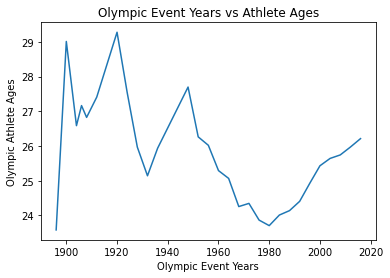

In [ ]:
olympic_groups = athlete_data.groupby('Year')
olympic_groups_agemean = olympic_groups.Age.mean()

plt.plot(olympic_groups_agemean)
plt.title('Olympic Event Years vs Athlete Ages')
plt.xlabel('Olympic Event Years')
plt.ylabel('Olympic Athlete Ages')
plt.show()


A trend to note is the age drop in the 1960s and 1980s; during this period of time, the Olympics only allowed for amateur athletes, causing the drop in age.

The spike in 1920 could be due to a variety of reasons. First, the end of WWI left many younger men deceased or injured, increasing the average age of men available to compete; younger women left single due to the war had to take care of children and their home alone, also increasing the average age of women available to compete. Secondly, the Spanish flu ravaged the world from 1918-1921. The death of many young Olympians due to the virus could also have spiked the average age. Finally, the small amount of women competing at that time could skew the average as a whole. Considering all three of these factors, a spike in 1920 makes sense. 

## Evaluation of Significance - Age
We wanted to further analyze these spikes and dips in age and see if they were due to pure chance or because of some other reason. We took a closer look at the years 1936 and 1948, where there was a 12 year gap in Olympic competition because the 1940 and 1944 Olympics were cancelled due to WWII. To do this we performed a two sample Z test. 

Our null hypothsis was that the difference in mean age for the year 1936 and 1948 was 0, and our alternate hypothesis is that this difference was nonzero. 

In [ ]:
age_1936 = athlete_data[(athlete_data.Year == 1936).dropna()]["Age"].dropna()
age_1948 = athlete_data[(athlete_data.Year == 1948).dropna()]["Age"].dropna()
z, pval = ztest(age_1936, age_1948, value = 0, alternative='two-sided', usevar='pooled', ddof=1.0)
print('z: {} , pval: {}'.format(z, pval))

z: -13.73025866427514 , pval: 6.6894267696661726e-43


Since our p-value was far less than the alpha being used (0.05) we can reject the null hypothesis. Therefore the increase in age between the 1936 and 1948 Olympics due to World War II is statistically significant. This age increase makes sense as younger, more athletic men were sent to war, leaving only older men to compete. 



## Representation by Gender

To look more into representation at the Olympics by gender, below we created line graph in order to display the number of women competing per year in the Olympics. 

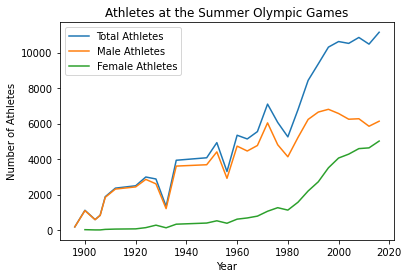

In [ ]:
total= athlete_data.groupby('Year')['Name'].nunique()
female_group= athlete_data.loc[athlete_data['Sex']=='M'].groupby('Year')['Name'].nunique()
male_group= athlete_data.loc[athlete_data['Sex']=='F'].groupby('Year')['Name'].nunique()

total.plot(label='Total Athletes')
female_group.plot(label='Male Athletes')
male_group.plot(label='Female Athletes')

plt.ylabel("Number of Athletes")
plt.title("Athletes at the Summer Olympic Games")
plt.legend(loc='upper left')
plt.show()

As the graph shows, there were no female Olympians until 1900. Since then, there has been a steady increase in the number of Olympians overall- both male and female. However, in more recent years, we see a greater increase in the number of female athletes and a slight decline in the number of male athletes.

## Representation of Age and Physical Build by Gender

Now that we have looked into how the general age representation and male and female representation over the years, we are interested in analyzing more information about each gender group, specifically the change in average age and physical build (height and weight) over the years. For each of these analyses, a scatterplot with a regression line is included, as well as a linear regression model with a slope and intercept.

#### Age

First, the average age will be analyzed. Note that there is no 1896 data for women since they did not compete until 1900 (as noted above). 

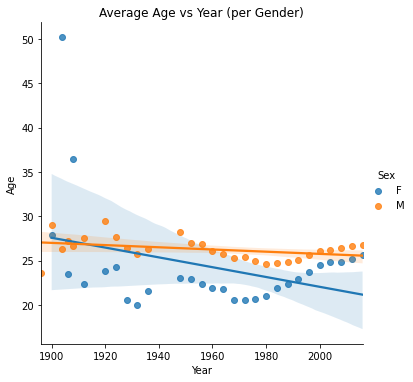

Regression slope for mens age is -0.01
Regression intercept for mens age is 27.05
r^2 value: 0.13
Regression slope for womens age is -0.06
Regression intercept for womens age is 27.57
r^2 value: 0.12


In [ ]:
#finding the average heights and weights by gender through grouping
average_df=athlete_data.groupby(['Sex','Year']).mean()
year_column = athlete_data.Year.sort_values().unique()
#add a gender and year column back to the grouped dataframe, since they were removed when it became an index
years = np.concatenate((year_column, year_column), axis=None)
years = years[1:]
female = ['F']*28
male = ['M']*29
sex = np.concatenate((female, male), axis=None)
average_df['Year'] = years
average_df['Sex'] = sex
#creating the scatterplot 
sns.lmplot(x='Year',y='Age', data=average_df, hue='Sex')
plt.title('Average Age vs Year (per Gender)')
plt.ylabel('Age')
plt.show()

lr = LinearRegression()

men = average_df.where(average_df.Sex == "M").dropna()
#resetting the x axis to make the first year of the Olympics "0"
men.Year = men.Year - 1896
#starting the linear regression for women in 1900, since that was the first year women competed
women_height = average_df.where(average_df.Sex == "F").dropna(subset=['Age'])
women_height.Year = women_height.Year - 1900
#creating the linear regression for men
lr.fit(men.Year.values.reshape(-1,1), men.Age)
predicted_men_age = lr.predict(men.Year.values.reshape(-1,1))
print("Regression slope for mens age is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for mens age is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(men.Age, predicted_men_age)))
#creating the linear regression for women
lr.fit(women_height.Year.values.reshape(-1,1), women_height.Age)
predicted_women_age = lr.predict(women_height.Year.values.reshape(-1,1))
print("Regression slope for womens age is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for womens age is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(women_height.Age, predicted_women_age)))

As seen above, the average summer Olympic male age over the years has slightly decreased. For every year, the average male age generally decreases by 0.01 years. 

On the other hand, the average summer Olympic female age has also decreased. For every year, the average female age decreases by 0.06 years. 

Notice the two outliers in women's age in the early 1900s, where the average age is nearly 50 and 36. This is a result of a lack of data, as the age data we have for those Olympic years in women's sports are only for sports where the average age is quite high - sports such as Archery and Shooting. 

The intercepts show the average age of male and female summer Olympians in thier first year of recorded competition. In 1896, the average male athlete age is 27.07 years; in 1900, the average female athlete age is 27.57 years.

Finally, the r^2 value analyzes how well the regression model fits the observed age data. For men, 13% of the average age points fit the regression model. For women, 12% of the average age points fit the regression model.

#### Height and Weight

Next, we analyze average height and weight. Because of the limited amount of females competing between 1900 and 1920, there is no height or weight data for women in this time period. Thus, our plots and regression begin in 1924 for women. 

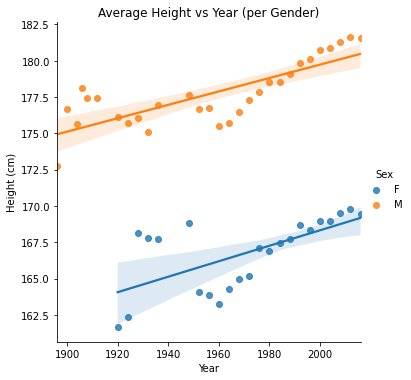

Regression slope for mens height is 0.05
Regression intercept for mens height is 174.93
r^2 value: 0.63
Regression slope for womens height is 0.05
Regression intercept for womens height is 164.76
r^2 value: 0.32


In [ ]:
sns.lmplot(x='Year',y='Height', data=average_df, hue='Sex')
plt.title('Average Height vs Year (per Gender)')
plt.ylabel('Height (cm)')
plt.show()
men = average_df.where(average_df.Sex == 'M').dropna()
men.Year = men.Year - 1896
women = average_df.where(average_df.Sex == 'F').dropna()
women.Year = women.Year - 1924
lr.fit(men.Year.values.reshape(-1,1), men.Height)
predicted_men_height = lr.predict(men.Year.values.reshape(-1,1))
print("Regression slope for mens height is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for mens height is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(men.Height, predicted_men_height)))
lr.fit(women.Year.values.reshape(-1,1), women.Height)
predicted_womens_height = lr.predict(women.Year.values.reshape(-1,1))
print("Regression slope for womens height is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for womens height is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(women.Height, predicted_womens_height)))

As shown by the data above, the average summer Olympic male height over the years has increased. For every year, the average male height generally increases by 0.05 centimeters. The average summer Olympic female height has also increased. For every year, the average female height increases by 0.05 centimeters. Their increases are approximately the same!  

The intercepts show the average height of male and female summer Olympians in thier first year of recorded competition. In 1896, the average male athlete height is 174.93 centimeters; in 1920 (as no heights were recorded in the dataset for female athletes before then), the average female athlete height is 164.76 centimeters.

For men, 63% of the average height points fit the regression model. For women, 32% of the average height points fit the regression model.

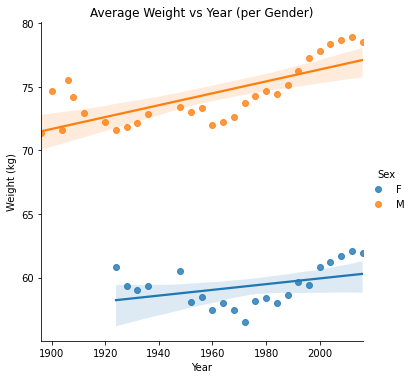

Regression slope for mens weight is 0.05
Regression intercept for mens weight is 71.51
r^2 value: 0.55
Regression slope for womens weight is 0.02
Regression intercept for womens weight is 58.22
r^2 value: 0.16


In [ ]:
sns.lmplot(x='Year',y='Weight', data=average_df, hue='Sex')
plt.title('Average Weight vs Year (per Gender)')
plt.ylabel('Weight (kg)')
plt.show()
lr.fit(men.Year.values.reshape(-1,1), men.Weight)
predicted_men_weight = lr.predict(men.Year.values.reshape(-1,1))
print("Regression slope for mens weight is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for mens weight is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(men.Weight, predicted_men_weight)))
lr.fit(women.Year.values.reshape(-1,1), women.Weight)
predicted_womens_weight = lr.predict(women.Year.values.reshape(-1,1))
print("Regression slope for womens weight is {slope:.2f}".format(slope = lr.coef_[0]))
print("Regression intercept for womens weight is {intercept:.2f}".format(intercept = lr.intercept_))
print("r^2 value: {:.2f}".format(r2_score(women.Weight, predicted_womens_weight)))

As shown by the data above, the average summer Olympic male weight over the years has increased. For every year, the average male weight generally increases by 0.05 kilograms. This weight increase for the men is the same ratio as the male increase in height- this makes sense, as an increase average height has increased as well would result in a proportional increase in average weight (one would assume). The average summer Olympic female weight has also increased. For every year, the average female weight increases by 0.02 kilograms. Even though female height increased with a slope of 0.05, female competitors somehow managed to lessen their weight increase over the years. 

The intercepts show the average weight of male and female summer Olympians in thier first year of recorded competition. In 1896, the average male athlete height is 71.51 kilograms; in 1920 (just as before, no weights were recorded in the dataset for female athletes before then), the average female athlete weight is 58.22 kilograms.

For men, 55% of the average weight points fit the regression model. For women, 16% of the average weight points fit the regression model.


##Evaluation of Significance - Physical Build by Gender

Clearly average height and weight for both men and women increased over time. Let's perform some hypothesis tests so see if these increases are statistically significant or due to random change. Our null hypothesis will be that the difference between mean weight in 1920 and 2016 is 0, and our alternate hypothesis will be that this difference is nonzero. The same will hold for mean height. We start in the year 1920 because this is the year when we have data for both mens and womens heights. Research has indicated that "over the last 150 years the average height of people in industrialized nations has increased approximately 10 centimeters (about four inches)" so we should certainly expect to reject the null hypothesis.

In [ ]:
weight_1920 = athlete_data[(athlete_data.Year == 1920).dropna()]["Weight"].dropna()
weight_2016 = athlete_data[(athlete_data.Year == 2016).dropna()]["Weight"].dropna()
z, pval = ztest(weight_1920, weight_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
print('z: {} , pval: {}'.format(z, pval))

z: 1.6305200392141603 , pval: 0.10299163344340592


In [ ]:
height_1920 = athlete_data[(athlete_data.Year == 1920).dropna()]["Height"].dropna()
height_2016 = athlete_data[(athlete_data.Year == 2016).dropna()]["Height"].dropna()
z, pval = ztest(height_1920, height_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
print('z: {} , pval: {}'.format(z, pval))

z: -0.6994854782318753 , pval: 0.48424868519537967


When we look at the heights as a whole (not divided by sex) we actually obtain high p values, indicating we should accept the null hypothesis. The reason for this are that in 1920, there were so few womens weights and heights recorded so the mean 1920 weight will be quite high since the sample will be dominated by mens weights and heights. This is probably the reason we see a marginally small change in the mean heights and weights and accept our null hypothesis. It is clear that to perform an accurate hypothesis test, we need to split by sex, and look year by year, since the means will be inaccurately high in earlier years with limited female representation. 

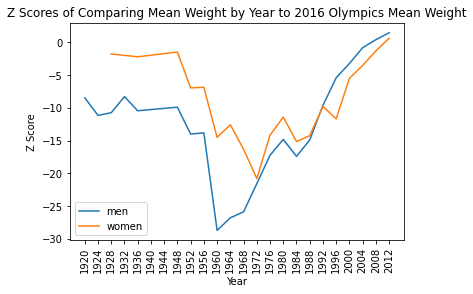

In [ ]:
male_zscores = []
female_zscores = []
male_weight_2016 = athlete_data.where((athlete_data.Sex == "M") & (athlete_data.Year == 2016)).dropna(subset = ["Weight"])["Weight"]
female_weight_2016 = athlete_data.where((athlete_data.Sex == "F") & (athlete_data.Year == 2016)).dropna(subset = ["Weight"])["Weight"]

for year in athlete_data["Year"].sort_values().unique()[6:-1]:
  male_weight = athlete_data.where((athlete_data.Sex == "M") & (athlete_data.Year == year)).dropna(subset = ["Weight"])["Weight"]
  z, pval = ztest(male_weight, male_weight_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
  male_zscores.append(z)
  #print('Year: {}, z: {} , pval: {}'.format(year, z, pval))

for year in athlete_data["Year"].sort_values().unique()[8:-1]:
  female_weight = athlete_data.where((athlete_data.Sex == "F") & (athlete_data.Year == year)).dropna(subset = ["Weight"])["Weight"]
  z, pval = ztest(female_weight, female_weight_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
  female_zscores.append(z)
  #print('Year: {}, z: {} , pval: {}'.format(year, z, pval))
 
plt.plot(athlete_data["Year"].sort_values().unique()[6:-1], male_zscores, label = "men")
plt.xlabel("Year")
plt.xticks(np.arange(1920, 2013, 4), rotation=90)
plt.ylabel("Z Score")

plt.plot(athlete_data["Year"].sort_values().unique()[8:-1], female_zscores, label = "women")
plt.title("Z Scores of Comparing Mean Weight by Year to 2016 Olympics Mean Weight")
plt.xlabel("Year")
plt.xticks(np.arange(1920, 2013, 4), rotation=90)
plt.ylabel("Z Score")

plt.legend()
plt.show()


We see that the Z scores (and thus their corresponding p values) are extraordinarily low until 1984, giving a rejection of the null hypothesis. This goes along with what we expected - that there should be a statistically significant difference in mean weight. This also reinforces our regression models above that mean weight is steadily increasing. After 1984 there seems to be a rapid increase in z scores, to the point where for men, the 2004, 2008, and 2012 z scores are -0.79, 0.43, and 1.49 and for women, the 2008 and 2012 z scores are -1.28 and 0.66. All these are greater than the -1.96 z score that corresponds to a 0.05 p value, and thus we can accept the null hypothesis for these years. This makes total sense - the mean values for weight of years close to 2016 should be pretty close to the 2016 mean weights, since there is less time for human bodies to evolve and weights to increase. Thus slight differences should not be statistically significant. 

We also see the limitation in womens weight data noted above come to play here. The z scores in early years are actually quite high, but this is because there is such limited womens representation, and a lot of it being in sports with a higher mean weight. This results in the earlier year means being higher than expected and a lot closer to 2016 mean womens weight, yielding higher z scores and higher p values. 


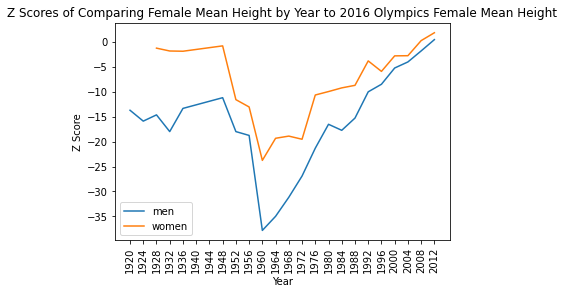

In [ ]:
male_zscores = []
female_zscores = []
male_height_2016 = athlete_data.where((athlete_data.Sex == "M") & (athlete_data.Year == 2016)).dropna(subset = ["Height"])["Height"]
female_height_2016 = athlete_data.where((athlete_data.Sex == "F") & (athlete_data.Year == 2016)).dropna(subset = ["Height"])["Height"]

for year in athlete_data["Year"].sort_values().unique()[6:-1]:
  male_height = athlete_data.where((athlete_data.Sex == "M") & (athlete_data.Year == year)).dropna(subset = ["Height"])["Height"]
  z, pval = ztest(male_height, male_height_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
  male_zscores.append(z)
  #print('Year: {}, z: {} , pval: {}'.format(year, z, pval))

for year in athlete_data["Year"].sort_values().unique()[8:-1]:
  female_height = athlete_data.where((athlete_data.Sex == "F") & (athlete_data.Year == year)).dropna(subset = ["Height"])["Height"]
  z, pval = ztest(female_height, female_height_2016, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
  female_zscores.append(z)

 
plt.plot(athlete_data["Year"].sort_values().unique()[6:-1], male_zscores, label = "men")
plt.title("Z Scores of Comparing Male Mean Height by Year to 2016 Olympics Male Mean Height")
plt.xlabel("Year")
plt.xticks(np.arange(1920, 2013, 4), rotation=90)
plt.ylabel("Z Score")

plt.plot(athlete_data["Year"].sort_values().unique()[8:-1], female_zscores, label = "women")
plt.title("Z Scores of Comparing Female Mean Height by Year to 2016 Olympics Female Mean Height")
plt.xlabel("Year")
plt.xticks(np.arange(1920, 2013, 4), rotation=90)
plt.ylabel("Z Score")

plt.legend()
plt.show()


The same trends in z score that we saw above for weight are present here in height. Low z scores until the 1980s, then a steady increase until the z scores are high enough from 2004 on to accept the null hypothesis. The limitation that was noted for womens data is also present here. In fact, we can see that the z scores begin to decrease at the same time, in the year 1948, so we can deduce that womens Olympic height and weight data was not truly representative of present day until about 1948. 

## Representation by Age and Physical Build - Track Specific

Next, a track and field (Athletics) model was created to analyze the trends in age, height and weight for track and field athletes. These analyses were done in personal interest, as we are all involved in the cross country/track and field teams at Cornell. 

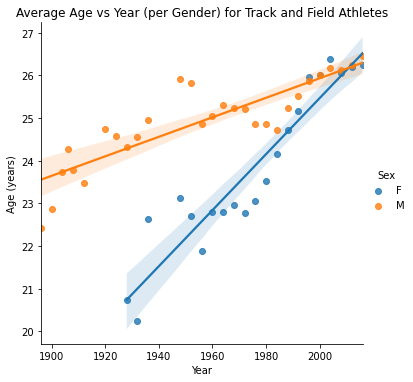

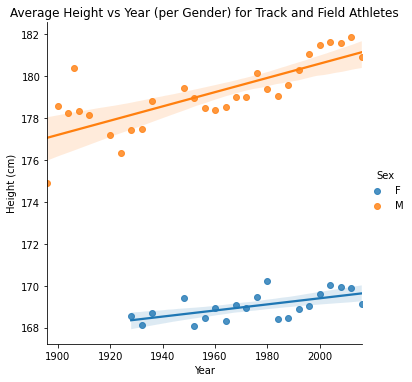

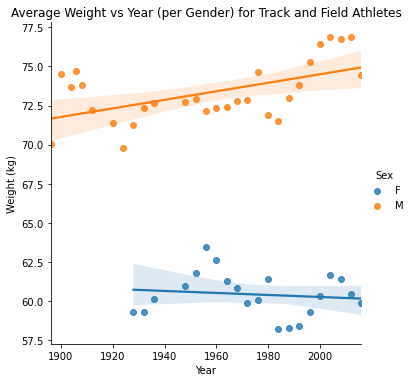

In [ ]:
track_average = athlete_data[(athlete_data.Sport == "Athletics").dropna()].groupby(['Sex','Year']).mean()
year_column = athlete_data.Year.sort_values().unique()

#add a gender and year column back to the grouped dataframe, since they were removed when it became an index
years = np.concatenate((year_column, year_column), axis=None)
years = years[8:]
female = ['F']*21
male = ['M']*29
sex = np.concatenate((female, male), axis=None)
track_average['Year'] = years
track_average['Sex'] = sex
sns.lmplot(x='Year',y='Age', data=track_average, hue='Sex')
plt.title('Average Age vs Year (per Gender) for Track and Field Athletes')
plt.ylabel('Age (years)')
sns.lmplot(x='Year',y='Height', data=track_average, hue='Sex')
plt.title('Average Height vs Year (per Gender) for Track and Field Athletes')
plt.ylabel('Height (cm)')
sns.lmplot(x='Year',y='Weight', data=track_average, hue='Sex')
plt.title('Average Weight vs Year (per Gender) for Track and Field Athletes')
plt.ylabel('Weight (kg)')
plt.show()


Age increases and begins to concentrate around the 25-27 year old range post 1980. This could be due to increases in research and knowledge of athletics, which indicate that athletic peak for many events is in the 25-27 year old range. It is likely that for the next many Olympic games that the mean age in track athletes will center between 25 and 27. 

Men's build has increased (both in height and weight) following the general trend above, but womens build has stayed the same. 

These changes in build for men might be attributed to advancements in training and a better understanding of event techniques. What I mean by this is that is when olympic sports started the athletes were built more as a jack of all trades rather than being built for specialization. So it would make sense that as events started to be won by athletes with certain desirable characteristics, that more athlete’s builds would be shaped to look like them. For women on the other hand, their build remaining constant over the years can be attributed to general fitness for women being better for track & field events. What that means, is that the characteristics that make a good track and field athlete and those that made an overall good olympian were already closely linked. This is one reason why there hasn’t been much change over the years, the ‘ideal’ build was already pretty much chosen from the start. 

## Representation of Height and Weight by Country

To further analyze physical build changes over the years of athlete, we wanted to analyze the change in Height vs Year by country and also Weight vs Year by country. The data was grouped by year and country so the change in average height and weight over the years by country could be analyzed below.

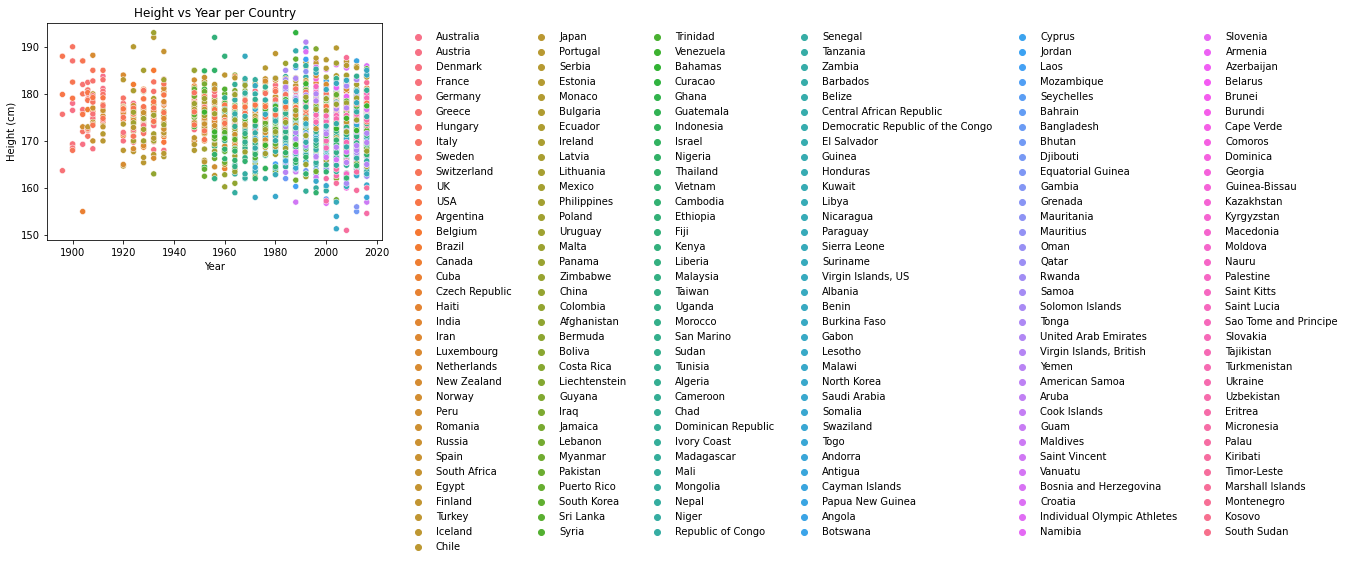

In [ ]:
country_grouping_averages=athlete_data.groupby(['Year','Country']).mean()
sns.scatterplot(x='Year',y='Height',data=country_grouping_averages, hue='Country')
num_countries=athlete_data.Country.nunique()
plt.legend(frameon=False ,loc=2,bbox_to_anchor=(1.05, 1), ncol=6)
plt.ylabel('Height (cm)')
plt.title('Height vs Year per Country')
plt.show()

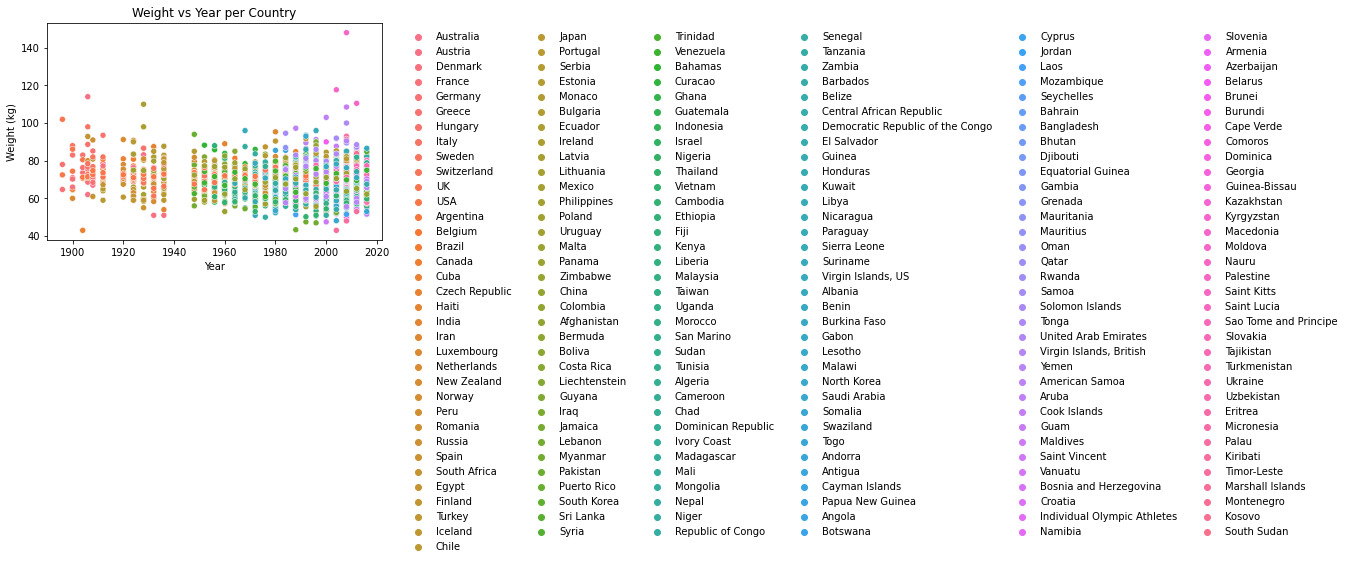

In [ ]:
sns.scatterplot(x='Year',y='Weight',data=country_grouping_averages, hue='Country')
num_countries=athlete_data.Country.nunique()
plt.legend(frameon=False ,loc=2,bbox_to_anchor=(1.05, 1), ncol=6)
plt.ylabel('Weight (kg)')
plt.title('Weight vs Year per Country')
plt.show()

We found that because of the high number of countries represented at the Olympics, our graph turned out to be hard to read but made for a colorful display!

A significant finding here in these graphs is that they more visibly show the gaps in this dataset - particularly for the years 1916, 1940, and 1944. These 3 years are the years the Olympics were cancelled due to WWI and WWII. Additionally, the increase in color variety within the later years represents how Country representation has increased over time!

##Determination of Sport by Physical Build

Since our findings on physical build were really interesting, we wanted to look more into how physical build has changed in the represented sports. 

For this, a scatterplot will be created in order to analyze the relationship between an athlete's physical build and the sport they compete in. A difference in hue based on sport will be used to see if there is a discernible difference between sports based on the athletes competing in that particular sport's builds. 

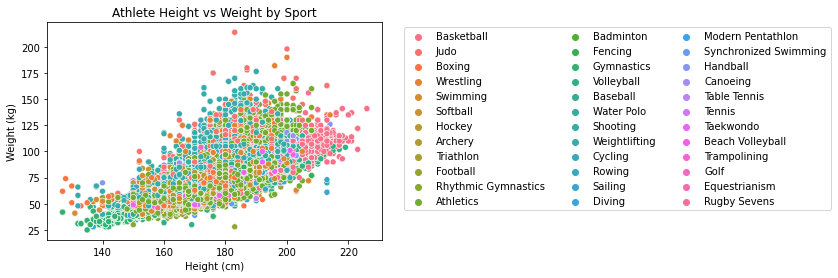

In [ ]:
sns.scatterplot(x='Height', y='Weight', hue='Sport', data=athlete_data)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1),ncol=3)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Athlete Height vs Weight by Sport')
plt.show()

As shown above, there is no discernable difference in the grouping of sports by athletes' heights and weights within this scatterplot. There is great overlap in most of the athletes' heights and weights. 

There are two groupings that are noticeable- those of basketball and gymnastics. Basketball players are known to be some of the tallest athletes; this is noticeable on the scatterplot above, as there is a pink cluster representing basketball Olympians on the greater end of the x-axis. On the other hand, gymnasts are known to be some of the shortest athletes at the Olympic Games; the scatterplot above confirms this, as a greenish-blue cluster representing Olympic gymnasts is at the lesser end of the x-axis.

The wide distribution of green data points (those of Athletics/track and field) is also easily explained- the wide variety of events within track and field correlate with a wide variety of physical builds, therefore resulting in a wide range of data points. 

In order to better see the difference between athletes' build depending on the Olympic sport they compete in, the scatterplot below graphs the average build of an athlete depending on their sport. 

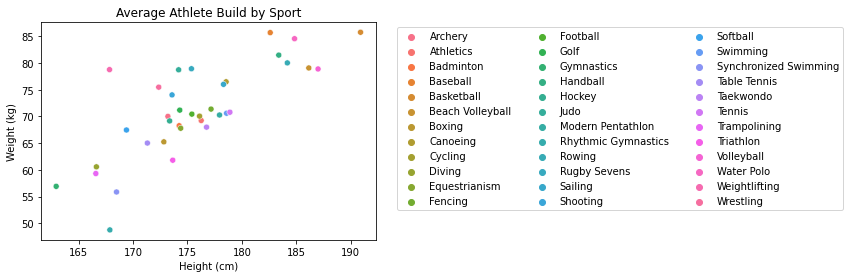

In [ ]:
sport_grouping=athlete_data.groupby('Sport').mean()

sns.scatterplot(x='Height', y='Weight', data=sport_grouping, hue='Sport')
plt.legend(loc='best',bbox_to_anchor=(1.05, 1), ncol=3)
plt.title('Average Athlete Build by Sport')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

This scatterplot makes it easier to visually identify the general differences between Olympic athletes' heights and weights based on their sport. 

As shown above, the average heights and weights of the groupings we could identify earlier (those of basketball and gymnastics) correlate with the positioning of the average height and weight shown on this new scatterplot. 


##Effect of Representation on Country Performance

After looking into different types of athlete attribute representation changes over time, we wanted to conclude our project by looking at one of the most important factors affecting the Olympics: Performance. As the title suggests, we want to find the answer to how representation affects country performance? Since there is a lot of data missing in the first half of the Olmypic data in our dataset, we decided to limit this analysis to the last 5 Olmypics. 

We decided to start our analysis by building a pie chart to figure out which 6 countries ("The Big 6") had the greatest amount of athlete representation within the Olympics over the years. 

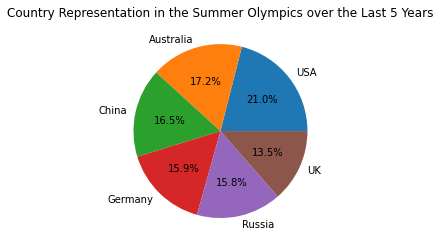

In [ ]:
last_5= athlete_data[(athlete_data['Year']==2000) | (athlete_data['Year']==2004) | (athlete_data['Year']==2008) | (athlete_data['Year']==2012) |(athlete_data['Year']==2016)]
country_count = last_5['Country'].value_counts()
country_count.head(6).plot.pie(y="Country",autopct="%0.1f%%")
plt.title("Country Representation in the Summer Olympics over the Last 5 Years")
plt.axis("off")
plt.show()

As shown above, the USA, Australia, China, Germany, Russia, and the UK have the greatest Olympian representation within the last 5 years, making them the "Big 6" (for this project, at least). To our surprise, France was not part of the top 6 countries; Australia was instead. 

Next, we build the same chart but this time to compare medal counts for every country represented at the Olympics in the last 5 games. The goal here is to analyze if the "Big 6" countries also have the greatest amount of medals within the last 5 games. 

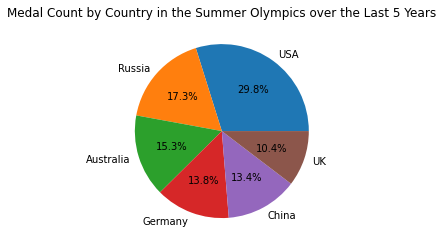

In [ ]:
country_groups=last_5.groupby(['Country']).count()
country_groups_medal = country_groups[country_groups['Medal'] != 0].sort_values(by='Medal', ascending=False)

country_groups_medal.head(6).plot.pie(y="Medal",autopct="%0.1f%%",legend=False)
plt.title("Medal Count by Country in the Summer Olympics over the Last 5 Years")
plt.axis("off")
plt.show()

To no surprise, the "Big 6" countries had the top medal counts within the past 5 years. 

Our findings here are not surprising as these countries have better facilities and funding for athletes. These countries also value sports highly which pushes children into participating in sports from a much younger age, resulting in athletes with great experience in their sport.

To see if this effect is visible in individual sports and in this case we look at Track & Field & Swimming.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


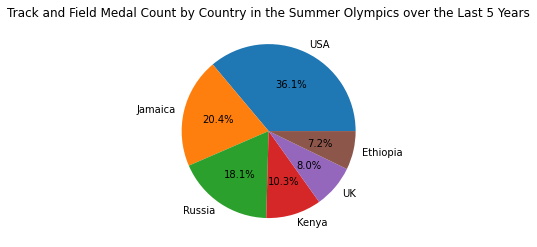

In [ ]:
track_country_groups = last_5[(last_5.Sport == "Athletics").dropna()].groupby(['Country']).count()
country_groups_medal = track_country_groups[country_groups['Medal'] != 0].sort_values(by='Medal', ascending=False)
country_groups_medal.head()
country_groups_medal.head(6).plot.pie(y="Medal",autopct="%0.1f%%",legend=False)
plt.title("Track and Field Medal Count by Country in the Summer Olympics over the Last 5 Years")
plt.axis("off")
plt.show()

Surprisingly, we see that Jamaica, Kenya, and Ethiopia are non Big-6 countries, but are second, fourth, and sixth respectively in the medal counts in track and field. This makes sense as the Jamaicans - most notably Usain Bolt - have been dominant in the short sprints and short sprint relays (100m, 200m, and 4x100m). Furthermore, the East African countries (Kenya and Ethiopia) are dominant in the long distance events such as the 5000m, 10000m, and Marathon. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


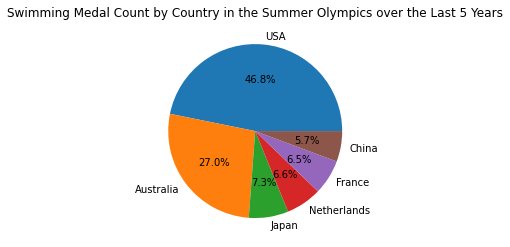

In [ ]:
swim_country_groups = last_5[(last_5.Sport == "Swimming").dropna()].groupby(['Country']).count()
country_groups_medal = swim_country_groups[country_groups['Medal'] != 0].sort_values(by='Medal', ascending=False)
country_groups_medal.head()
country_groups_medal.head(6).plot.pie(y="Medal",autopct="%0.1f%%",legend=False)
plt.title("Swimming Medal Count by Country in the Summer Olympics over the Last 5 Years")
plt.axis("off")
plt.show()

Analyzing swimming, we see that the United States dominates the sport, having won nearly half of all the total medals in the past 5 Olympic games. However, some non Big-6 countries such as Japan and the Netherlands have seen great success in swimming. 

From these two analyses it is clear that certain smaller countries exhibit dominance in certain sports, but the Big-6 countries have the most depth across the widest variety of sports which allows them to garner the highest medal total over all events. 

Since the USA seems to be dominant in most of the pie chart analyzations, let's take a look at the cumulative medal count for the USA over the past 5 years. 

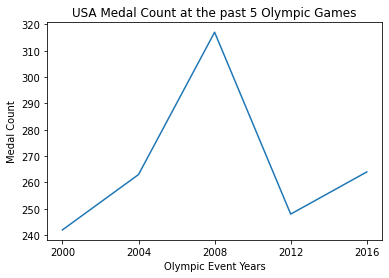

In [ ]:
usa_medals = last_5[(last_5.Country == "USA").dropna()].dropna(subset=['Medal'])
last_5_years = [2000, 2004, 2008, 2012, 2016]
usa_count = []
for year in last_5_years:
  usa_count.append(usa_medals[usa_medals.Year == year]["Medal"].size)
plt.plot(last_5_years, usa_count)
plt.title('USA Medal Count at the past 5 Olympic Games')
plt.xlabel('Olympic Event Years')
plt.ylabel('Medal Count')
plt.xticks(np.arange(2000, 2017, 4))
plt.show()

The spike in 2008 for the United States represents the most Olympic medals the USA has ever won on foreign soil. This spike was aided by Michael Phelps, who in 2008 set the record for the greatest number of Olympic gold medals won, and Natalie Coughlin, who won 6 medals in 2008, the most ever for a female Olympic swimmer. The USA men's and women's basketball teams, men's volleyball, men and women's beach volleyball, women's soccer, women's rowing, and the men's and women's 4 × 400 meter relay teams all won gold as well. 

# Interpretation and Conclusions

Our project led us to some interesting conclusions about what shapes and sizes Olympians come in and how they affect representation and performance. Starting by looking at the average age of Olympians throughout the years we found that there were many factors that played into this number. Specifically, when looking at the Olympic games that occurred before and after the Second World War we wanted to see if the war added a statistically significant impact on driving the average age up. We ended up with a P-value that was extremely small meaning that yes, from a statistical standpoint WWII did have a significant impact on the age of Olympians. 

From age, we then dove deeper into representation in Olympic Games by gender. Here we just wanted to look at and point out how the breakdown of men vs women has changed throughout the 20th century. This was eye opening to us because at the beginning of our data (1896) there were no women competing, but by the end of our data (2016) women made up nearly half of the participants. On top of just looking at data for trends, we ran a linear regression for each gender to try to find trends in between both the gender and age of athletes.

Our analysis then shifted from just gender and age to the more specific categories of height and weight. Here we again ran a linear regression for both genders on height and weight to find trends and saw that both men’s and women’s height has been increasing steadily by .05 centimeters for each gender group. We had similar findings for weight as men’s increased by .05 kilograms and women's increased by .02 kilograms. We then ran significance tests to see whether these changes were statistically significant or not. We were first surprised to see that our p values were high but we later found that there was very little women’s data collected in earlier Olympics hence, our sample was dominated heavily by male athlete data. This pushed us to split up our data by gender and year to get more significant results. By running our updated significance tests again, we were able to find more significant results as we expected!

Another part of this data set that we analyzed was something that was close to all of us- representation and build of track and field athletes over the years. From this analysis we saw the average build of male and female athletes evolve over time to shape the current athletes we see today. This was particularly interesting because as the years went on and different events were introduced to athletics, you began seeing athletes' builds changing accordingly.

When talking about builds of athletes at the olympics, we noticed that there was tons of specialization by sport. This of course makes plenty of sense- for example, an Olympic basketball player and an Olympic gymnast have extremely different builds that allow them to be successful- we wanted to highlight this through a scatter plot. One takeaway from the scatterplot, that again is close to us, is how athletics (track and field) athletes are spread out throughout the different heights and weights while other sports have distinct locations. This also makes plenty of sense, because in athletics the numerous events range from strength training dominated throwing to endurance dominated marathoning, resulting in athletes of all shapes and sizes.

One of the last things we looked at was representation and winning by the top countries. We started looking at this by compiling a group of top countries based on total medal count; our curiosity and intuition drove us to ask the question ‘does having the most athletes at the olympics mean you’ll have the most medals?’. The answer to this question seemed to be yes, but our stubbornness made us want to look further into specific events and see if that still held true. Specifically in track and field, we expected certain nations to perform at a much higher level than their other sports. This did happen to be the case as Kenya, Jamaica, and Ethiopia played a much larger role in winning medals. This result satisfied our curiosity and logically made sense based on our own knowledge of the sport.


# Data Limitations

A big limitation we faced in this dataset was the limitation of analyzing performance. The only way of analyzing performance with this dataset is through medals won by athletes. If we would like to look more into every atheletes performances regardless of if they got a medal or not, we will have to search for more robust datasets.

Additionally, since only developed nations would allow women to compete in the olympics there is no weight and height data observed for women athletes before 1924. There was also no height and weight data registered for the sport Polo, thus, even though our aim was analyze all the sports we will be able to watch in the 2021 olmypics, we had to cut Polo out of our sports analysis.

Another limitation in this dataset was duplicate athletes. Athletes who compete in multiple events within the same year get counted for each event (ie- the weight and height gets counted 3x for a person who competes in 3 events so it will lead to a pretty big skew in analyzing data). We were unable to overcome this issue as we would not be able to group by each athlete that had competed both in different events, and in different Olmypics. 

Also, the 'Weight' column uses kilograms as units, and the 'Height' column uses centimeters as units. As Americans who are not entirely familiar with the metric system this was challenging to understand while analyzing our data. While it could be overcome by converting the entries, we did not find this cleaning process necessary.

One last limitation we noticed was when specifically running the analysis on medal count. We realized that for sports with relays, such as athletics and swimming, if a relay for a particular country won a medal, 4 medals were administered instead of 1 (since there are 4 members on the relay), which could skew the counts since this dataset looks at individual athletes. The same can be said for teams such as soccer, as medals are distributed to every member.

# Acknowledgements

- Friends and family for mental support!
- All the INFO 2950 TA's
- Stack Overflow - for programming related questions: https://stackoverflow.com/
- Gebru et al.: https://arxiv.org/pdf/1803.09010v7.pdf
- The Olympic data on www.sports-reference.com
- Wikipedia, for general Olympic facts- https://www.wikipedia.org


Acknowledgements to also Cornell Track & Field teammates and coaches who were willing to listen to us bounce ideas off of one another at practice over the last few months!

# Appendix

## Link To Dataset

Although we tried to minimize the dataset as much as possible, we were only able to get it down to 25.4 MB. We have uploaded it to Box and have shared the link below:
https://cornell.box.com/s/dlhpfxmp3zqwhs2m7nrich2eh4mc98di


## Data Cleaning

We downloaded our dataset from a Kaggle dataset on 120 years of Olympic Athlete data.

Source = https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv

Since our dataset had about 270,000 observations, which was far too large, we decided to only focus on the Summer Olympics, as there have been more Summer Olympics in history and there are a wider range events contested. Additionally, we run Track and Field at Cornell - which is contested in the summer - and our head coach as well as some Cornell Track alumni are in this dataset. Thus, we felt we could relate more to analyzing only Summer Olympic events.

Luckily there was a season column, so we could filter out all of the data associated with a Winter Olympic. After that, the ID, Games, and Season columns were redundant so we removed them as well.

We then realized there was a lot of data on sports that have not been contested in recent Olympics. So, we decided to only include data for sports that will be contested in the upcoming Summer 2021 Games. Polo is a summer sport but was also removed, as it contained a lot of NaN values for height and weight.

Since team name and country differed for certain sports such as sailing and golf, we merged two tables: noc_data.csv and athlete_data.csv in order to apply country names to those who had "NOC" for their country names. We merged on a "NOC" column and used the region codes to convert NOC region codes to countries. Doing this merge also solved our issue of inconsistencies in country names across years (ex: USSR has been converted to Russia)

Our completed data cleaning process with the code has fully been moved to the Data Cleaning - Olympics.ipynb attached to this project.

## Extra Data Analysis

Since 3 of us are runners on Cornell's cross country and track and field teams, we decided to look at some of Cornell's "Athletics" Olympians. 

First, a recent Cornell track and field team member, Rudy Winkler! 

In [ ]:
Cornell = np.where((athlete_data.Name == "Rudy Winkler"))
athlete_data.loc[Cornell]

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Country
84511,84511,Rudy Winkler,M,21.0,188.0,109.0,United States,USA,2016,Rio de Janeiro,Athletics,Athletics Men's Hammer Throw,NaN,USA


Although Rudy did not medal in 2016, he recently moved to No. 2 on the all-time U.S. performer list with a throw of 268 ft, 11 inches. This also comfortably puts him atop the world leader list, making him the clear favorite to bring home the gold in Tokyo. 

Next, our coach, Adrian Durant!

In [ ]:
Cornell = np.where((athlete_data.Name == "Adrian Kent Russell Durant"))
athlete_data.loc[Cornell]

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Country
206085,206085,Adrian Kent Russell Durant,M,19.0,173.0,68.0,United States Virgin Islands,ISV,2004,Athina,Athletics,Athletics Men's 100 metres,NaN,"Virgin Islands, US"


Another previous Cornell track and field team member, Charlie Moore, medaled at the games. Charlie Moore has one of the most impressive resumes in track and field history. He has never lost a 400m hurdle race in his entire career, he then served as president of the US olympic team in the 1970s and 80s and on top of that he was a long time athletic director at Cornell.
 
Charlie unfortunately passed away this past fall and it is a loss that the Cornell track and field community has felt profoundly in an already tough year. When athletics do resume this year it will be for the first time in nearly 8 decades that Charlie isn't watching the results closely, but we know the winning spirit he showed as both an athlete and administrator at Cornell will live on forever in the CUTF athletes of today


In [ ]:
Cornell = np.where((athlete_data.Name == 'Charles Hewes "Charlie" Moore, Jr.'))
athlete_data.loc[Cornell]

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Country
79448,79448,"Charles Hewes ""Charlie"" Moore, Jr.",M,22.0,185.0,77.0,United States,USA,1952,Helsinki,Athletics,Athletics Men's 400 metres Hurdles,Gold,USA
79449,79449,"Charles Hewes ""Charlie"" Moore, Jr.",M,22.0,185.0,77.0,United States,USA,1952,Helsinki,Athletics,Athletics Men's 4 x 400 metres Relay,Silver,USA


Finally, 2 more previous Cornell track and field athletes, Al Hall and Meredith Gourdine.

In [ ]:
Cornell = np.where((athlete_data.Name == 'Albert William "Al" Hall'))
athlete_data.loc[Cornell]

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Country
75438,75438,"Albert William ""Al"" Hall",M,22.0,185.0,99.0,United States,USA,1956,Melbourne,Athletics,Athletics Men's Hammer Throw,NaN,USA
75439,75439,"Albert William ""Al"" Hall",M,26.0,185.0,99.0,United States,USA,1960,Roma,Athletics,Athletics Men's Hammer Throw,NaN,USA
75440,75440,"Albert William ""Al"" Hall",M,30.0,185.0,99.0,United States,USA,1964,Tokyo,Athletics,Athletics Men's Hammer Throw,NaN,USA
75441,75441,"Albert William ""Al"" Hall",M,34.0,185.0,99.0,United States,USA,1968,Mexico City,Athletics,Athletics Men's Hammer Throw,NaN,USA


In [ ]:
Cornell = np.where((athlete_data.Name == 'Meredith Charles Gourdine (Gouardino-)'))
athlete_data.loc[Cornell]

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Country
75135,75135,Meredith Charles Gourdine (Gouardino-),M,22.0,183.0,76.0,United States,USA,1952,Helsinki,Athletics,Athletics Men's Long Jump,Silver,USA
